# Tyrolean Pretension

## Motivation
In cave rescue tyrolean lines are used to help manouvre a stretcher over difficult near-horizontal terrain. When the load is put on a tyrolean line, it can be expected to sag "quite a lot". 

**Q1) How much does sag can you expect on a tyrolean? (Dependent on load, span, rope characteristics, pretension)**

Sag can be problematic when it causes the patient to hit the ground, or other obstacles. This problem can be alleviated by pretensioning the line, as a tigher line will sag less. 

**Q2) How much do you need to pretension the line to achieve a particular sag? (Dependent on load, span, rope characteristics)**

Making these calculation in a cave is unrealistic, so we need rules of thumb, or shortcuts to help decision making. 

**Q3) What rules of thumb can guide sag/pretensioning deisions in reality? (Dependent on span, allowable sag, assume 100kg load, assume typical 9mm semi-static rope)**

## Theory

If you have a span of of length $l$, then you need an untensioned rope of the same length.

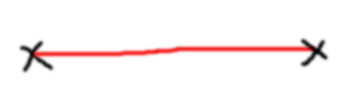

As you tension the rope, you are applying a pretension force, $T_p$. Under that tension, the rope elongates by $\Delta_p$. If the whole length were tensioned, it would streth from length $l$ to $l + \Delta l_p$. However, only the segement that remains bewteen the two anchors is tensioned, the extra is removed as "slack". So how much of the original length of rope ultimately ends up between the two anchors? It would just be $l \frac{l}{l + \Delta l_p}$ or $\frac{l^2}{l + \Delta l_p}$

Why isn't it $l - \Delta l_p$ ? Becuase $\Delta l_p$ is the *tensioned* extra length. Using the same reasoning, but calculating with the *untensioned* length you get $l + \Delta l_p - \Delta l_p \frac{l}{l + \Delta l_p}$ which equates to the same as above. 

Now consider applying a load to the center of the pretensioned line. The line will sag until the vertical components of the tension in the line are large enough to support the weight of the load. Using equivalent triangles (forces equivalent to lengths), we can determine the equality:

**Eqn 1.** $\frac{F}{2s} = \frac{T_F}{\sqrt{l^2 /4 + s^2}}$

where $F$ is the force applied by the load, halved because half the load is taken by each strand. 
$T_F$ is the tension in the line, this is equal across the length of the line.
$s$ is the sag height, vertical distance between the equilibrium point of the load and the anchor points.
$l$ is still the span length. 
The $\sqrt{l^2 /4 + s^2}$ component is the length of one half of the rope after it has stretched down to a sag of $s$.

The total length of the rope (in the system) (between the anchors) is now $2 \sqrt{l^2/4 + s^2}$. So, from the unstretched length (in the system) of $\frac{l^2}{l + \Delta l_p}$, we have elongated (in absolute terms) by 

**Eqn 2.** $\Delta l_F = 2 \sqrt{l^2/4 + s^2} - \frac{l^2}{l + \Delta l_p}$

Here we've added the term $\Delta l_F$ to represent the elongation under load. 

The final equation we need comes from the properties of the rope. Rope under tension elongates as per its stress-strain curve. Stress strain curve will be specific to the type rope used. (See Rope Lab 'Rope Stretch' article for a good selection of examples). The rough guess we're using here is elongation of 5% at 1.5kN, which is roughly equivalent to a Beal Antipodes 9mm semi-static. Super low stretch (canyoning or HTP rope is very different from that, but most semi-static ropes are in the range 1.0-2.0kN @5% elongation).

We assume that the rope behaves linearly in this region, so the slope of the stress strain curve is the same at our known point (1.5kN, 5%), as at our loaded point. When it is loaded the tension in the rope is $T_F$, and the elongation (as a portion of its length) is $ \frac{\Delta l_F}{\frac{l^2}{l + \Delta l_p}} $, so we get:

$\frac{\sigma}{\epsilon} = \frac{T_F}{\frac{\Delta l_F}{\frac{l^2}{l + \Delta l_p}}} $

or

**Eqn 3.** $\frac{\sigma}{\epsilon} = \frac{T_F l^2}{\Delta l_F (l + \Delta l_p)}$

Solving equations 2 and 3 simultaneously, we can get $\Delta l_p$ in terms of knowns values:

$\Delta l_p = \frac{

In [1]:
import numpy as np
from math import sqrt
import itertools

In [2]:
import matplotlib
from matplotlib import pyplot as plt

In [3]:
def calculate_pretension(l, s, F=1, sigma=1.5, epsilon=0.05):
    assert epsilon<1
#     print(f"length: {l}")
#     print(f"sag: {s}")
    
    B = 2*sqrt(l*l/4 + s*s)
    # B is an intermediatary value, useful for calculation, but not meaningful
#     print(f"new length under load: {B}")
    
    T_F = F/(2*s) * B/2
    # T_F is the tension in the rope
#     print(f"tension to sustain load at that position: {T_F}")
    
    delta_lp =  T_F*epsilon*l*l/(sigma*B) + l*l/B - l
    # delta_lp is the change in length under pretension
    if delta_lp<0:
        return None
    
#     print(f"Slack taken up in preload: {delta_lp}")

    delta_lf = B - l*l / (l + delta_lp)
    # delta_lf is the change is length under load
#     print(f"Total length added to used rope: {delta_lf}")
    
    
    T_p = delta_lp * sigma / (epsilon * (l*l / l + delta_lp))
    # T_p is the required pretension
#     print(T_p)
    
    return {'T_F': T_F, 'delta_lf': delta_lf, 'delta_lp': delta_lp, 'delta_T_p': T_p, 'l': l, 's': s, 'F': F}
calculate_pretension(40, 1)
print()
calculate_pretension(40, 3)

{'T_F': 3.370624736026114,
 'delta_lf': 4.085429458147097,
 'delta_lp': 4.00189855917634,
 'delta_T_p': 2.728449469375294,
 'l': 40,
 's': 3,
 'F': 1}

as sag increases:
    tension decreases
    extra length (under tension) decreases - but it should increase

In [4]:
def collect_data(ss, ls, F=1):
    results = np.array([calculate_pretension(l, s, F) for l,s in (itertools.product(ls, ss))])
    results = results[results != np.array(None)]

    lengths = [r['l'] for r in results]
    pretensions = [r['delta_T_p'] for r in results]
    ultimate_tensions = [r['T_F'] for r in results]
    sags = [r['s'] for r in results]
    
    return lengths, pretensions, ultimate_tensions, sags

### Old graphs

(0.0, 10.0)

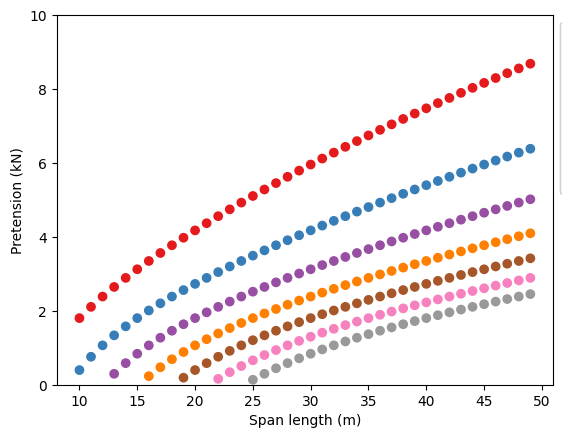

In [5]:
lengths, pretensions, _, sags = collect_data([1,1.5,2,2.5,3,3.5,4], range(10,50))

fig, ax = plt.subplots()
scatter = ax.scatter(lengths, pretensions, c=sags, cmap='Set1')

legend1 = ax.legend(*scatter.legend_elements(), title="Sag at 1kN (m)", bbox_to_anchor=(1, 1))
ax.add_artist(legend1)

plt.xlabel('Span length (m)')
plt.ylabel('Pretension (kN)')
plt.ylim(0,10)

(0.0, 5.12)

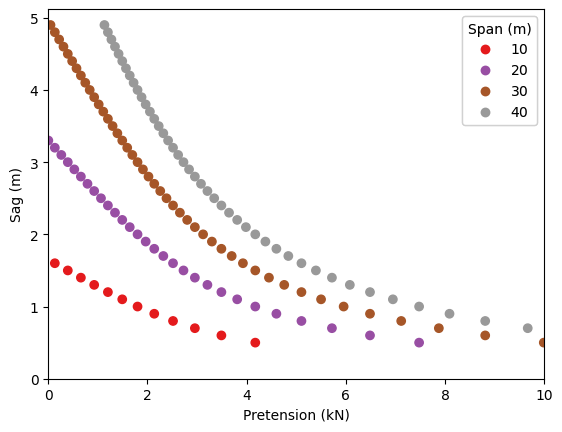

In [6]:
ss = np.array(range(50,500,10))/100
ls = range(10,50,10)
lengths, pretensions, _, sags = collect_data(ss, ls)

# results = np.array([(l, s, *calculate_pretension(l, s)) for l,s in (itertools.product(ls, ss))])

fig, ax = plt.subplots()

scatter = plt.scatter(pretensions, sags, c=lengths, cmap='Set1')

legend1 = ax.legend(*scatter.legend_elements(), title="Span (m)", bbox_to_anchor=(1, 1))
ax.add_artist(legend1)

plt.xlabel('Pretension (kN)')
plt.ylabel('Sag (m)')
plt.xlim(0,10)
plt.ylim(0,)

(0.0, 10.0)

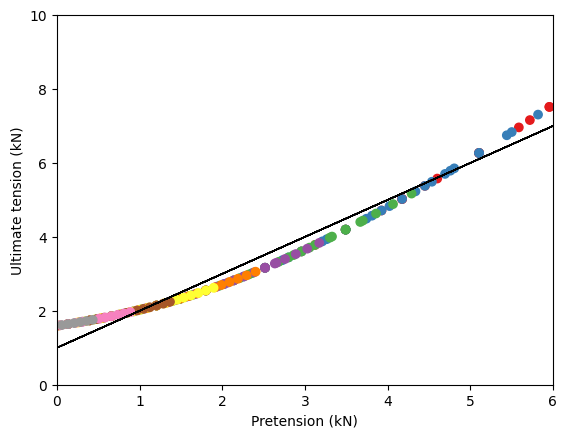

In [7]:
ss = np.array(range(5, 100, 1)) / 10
ls = range(10,40,5)

F=1
lengths, pretensions, ultimate_tensions, sags = collect_data(ss, ls, F)

fig, ax = plt.subplots()

scatter = plt.scatter(pretensions, ultimate_tensions, c=sags, cmap='Set1')

legend1 = ax.legend(*scatter.legend_elements(), title="sag (m)", bbox_to_anchor=(1.3, 0.8))
ax.add_artist(legend1)

approx_xs = np.array(pretensions)
approx_ys = [s+F for s in approx_xs]
plt.plot(approx_xs, approx_ys, color='k', linestyle='-', linewidth=1)

plt.xlabel('Pretension (kN)')
plt.ylabel('Ultimate tension (kN)')
plt.xlim(0,6)
plt.ylim(0,10)


## New graphs

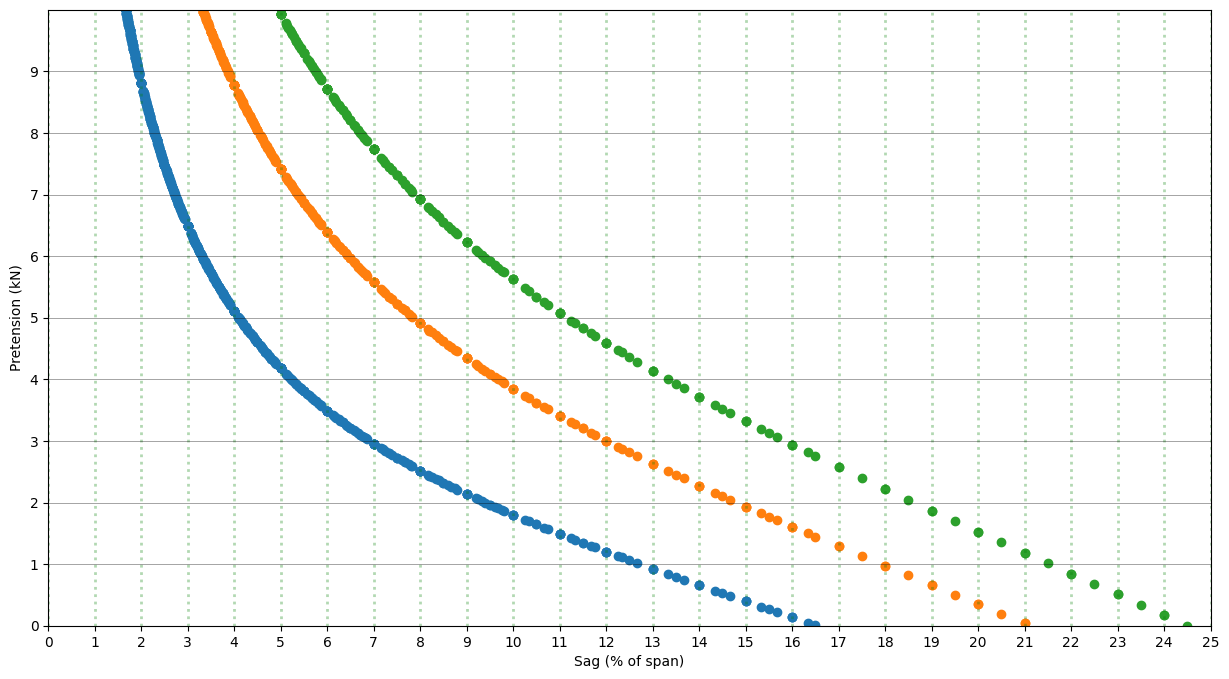

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))

def plot_sag_pretension(F=1):
    ss = np.array(range(50,500,10))/100
    ls = range(10,500,10)
    lengths, pretensions, ultimate_tensions, sags = collect_data(ss, ls, F)

    ax.grid(axis="x", color="green", alpha=.3, linewidth=2, linestyle=":")
    ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)

    sag_percentages = np.divide(sags,lengths)*100
    scatter = plt.scatter(sag_percentages, pretensions)

    plt.ylabel('Pretension (kN)')
    plt.xlabel('Sag (% of span)')
    plt.xlim(0,)
    plt.ylim(0,10)
    plt.xticks(np.arange(0, max(sag_percentages)+1, 1.0))
    plt.yticks(np.arange(0, 10, 1.0))

    xs = np.divide(sags,lengths)*100
    ys = pretensions

plot_sag_pretension(1)
plot_sag_pretension(2)
plot_sag_pretension(3)

In [9]:
#These were some attempts to approximate this curve. None are very good. 

# # Approx sag line load/%sag /4
# sag_props = np.array(range(2,200))/10
# load_approx_exp = [100/(s*5) for s in sag_props]
# plt.plot(sag_props, load_approx_exp, color='k', linestyle='-', linewidth=1)

# load_approx_exp2 = [11.4*0.83**s for s in sag_props]
# plt.plot(sag_props, load_approx_exp2, color='g', linestyle='-', linewidth=1)


# load_approx_lin = [20/s for s in sag_props]
# plt.plot(sag_props, load_approx_lin, color='r', linestyle='-', linewidth=1)

All these approximations are bad. The gist is, to get 10% sag, you need 5kN, to get 5% sag you need 4.5kN.

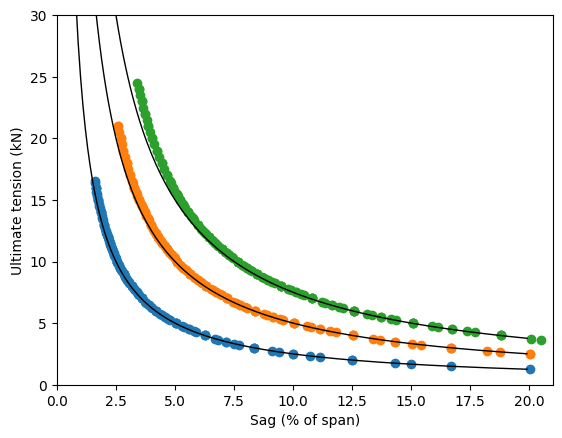

In [10]:
fig, ax = plt.subplots()

def plot_sag_ultimate_load(F):
    ss = np.array(range(50,500,10))/100
    ls = range(10,50,10)
    lengths, pretensions, ultimate_tensions, sags = collect_data(ss, ls, F)


    scatter = plt.scatter(ultimate_tensions, np.divide(sags, lengths)*100)


    # Approx sag line load/%sag /4
    sag_props = np.array(range(2,200))/10
    load_approx = [F*100/s / 4 for s in sag_props]
    plt.plot(sag_props, load_approx, color='k', linestyle='-', linewidth=1)

    plt.ylabel('Ultimate tension (kN)')
    plt.xlabel('Sag (% of span)')
    plt.xlim(0,)
    plt.ylim(0,30)
    
plot_sag_ultimate_load(1)
plot_sag_ultimate_load(2)
plot_sag_ultimate_load(3)

The vertical rescue for caving book recomended the approximiation $F = \frac{span \times load}{4 \times sag}$. which turns out to be an excellent approximation. 

# Practical questions (with load 1kN):


### How much will a typical line sag?

Tensioned on 3:1 thorugh a stop with 3 people pulling at max, gets about 3kN. Which equates to 7% sag.

More generally:
1kN: 13%
2kN: 10%
3kN: 7%
4kN: 5%
5kN: 4%


### How much will it sag if we don't tension it?

Just taking the slack out of the rope (exactly what that means, and how hard you need to pull to achieve that are questions for another day), and chucking a weight in the middle. How much will it sag? 

16.5% 

### How many people do I need to put on a 3:1 to achieve the sag I need?

To halve your sag, pretension about 3kN. Half it again by pretensioning to 5kN. Massively diminishing returns from there.  


### How much pretension is too much?

Conider the ultimate tension = pretension + load + 1 to 1.5kN. 

### Rule of thumb for sag?
At less than 25% sag, you can use the rule of thumb forces = load * span / 4 * sag
